In [28]:
import json
import matplotlib.pyplot as plt
from collections import Counter

with open("results.json", "r", encoding="utf-8") as f:
    read_file = json.load(f)

def findValues(filters):
    plotData = []
    plotLabels = []

    for el in read_file:
        splitted = el["file"][:-5].split("-")
        uppercase_parts = [part for part in splitted if (part.isupper() and part != "GPT")]
        for filter in filters:
            if uppercase_parts == filter:
                plotData.append(el["f1score"])
                temp = el["file"][:-5]
                if len(filter) == 0:
                    plotLabels.append(temp)
                else:
                    plotLabels.append(temp[:-len("".join(filter))][:-len(filter)])
    
    return plotLabels, plotData

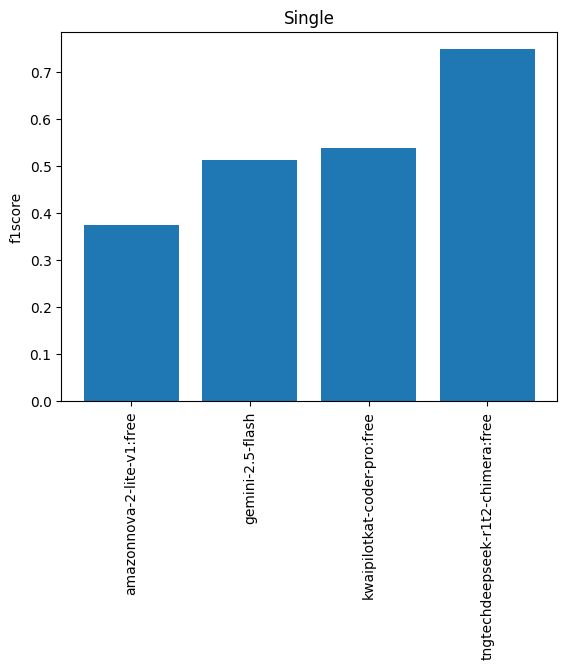

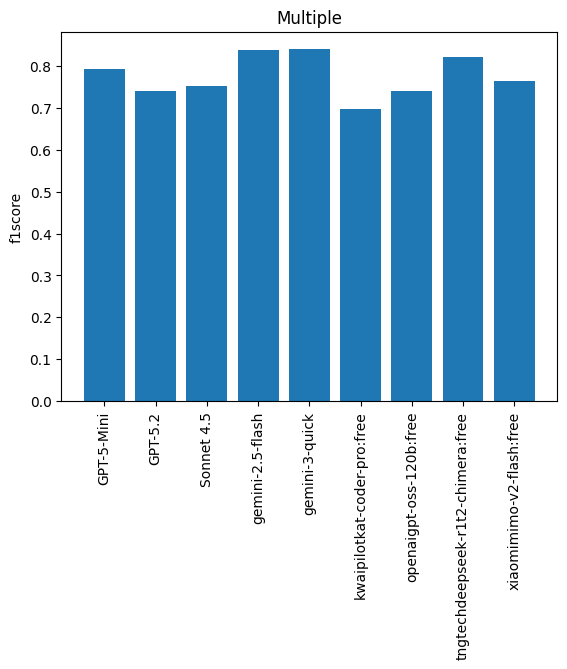

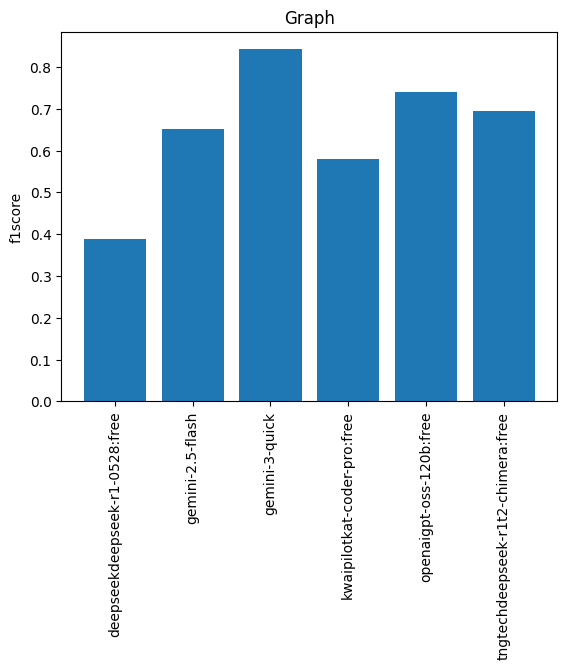

In [15]:
labels, data = findValues([[]])

plt.figure()
plt.bar(labels, data)
plt.ylabel("f1score")
plt.title("Single")
plt.xticks(rotation=90)
plt.show()

labels, data = findValues([["MANUAL"],["MULTIPLE"]])

plt.figure()
plt.bar(labels, data)
plt.ylabel("f1score")
plt.title("Multiple")
plt.xticks(rotation=90)
plt.show()

labels, data = findValues([["GRAPH"], ["GRAPH", "MULTIPLE"], ["MANUAL", "GRAPH"]])

plt.figure()
plt.bar(labels, data)
plt.ylabel("f1score")
plt.title("Graph")
plt.xticks(rotation=90)
plt.show()

In [43]:


print("all models")
results = []
num = 0
for el in read_file:
    num += 1
    with open(f"results/{el["file"]}", "r", encoding="utf-8") as f:
        temp = json.load(f)
    for values in temp:
        if values["expected"] != values["received"]:
            results.append(values["id"])

counts = Counter(results)
for number, freq in counts.items():
    if freq/num > 0.3:
        print(f"{number} appeared in {freq/num*100:.0f}%")

print("good models")
results = []
num = 0
for el in read_file:
    if el["f1score"] > 0.7:
        num += 1
        with open(f"results/{el["file"]}", "r", encoding="utf-8") as f:
            temp = json.load(f)
        for values in temp:
            if values["expected"] != values["received"]:
                results.append(values["id"])

counts = Counter(results)
for number, freq in counts.items():
    if freq/num > 0.3:
        print(f"{number} appeared in {freq/num*100:.0f}%")


all models
2 appeared in 39%
7 appeared in 35%
578 appeared in 30%
638 appeared in 30%
677 appeared in 35%
18 appeared in 35%
462 appeared in 35%
17 appeared in 30%
48 appeared in 35%
59 appeared in 30%
88 appeared in 30%
589 appeared in 30%
good models
2 appeared in 55%
7 appeared in 45%
638 appeared in 36%
97 appeared in 36%
18 appeared in 36%
88 appeared in 36%


ID 2
Code:
void OverlayWindowViews::OnGestureEvent(ui::GestureEvent* event) {
  if (event->type() != ui::ET_GESTURE_TAP)
    return;

  hide_controls_timer_.Reset();

  if (!GetControlsScrimLayer()->visible()) {
    UpdateControlsVisibility(true);
    return;
  }

  if (GetCloseControlsBounds().Contains(event->location())) {
    controller_->Close(true /* should_pause_video */,
                       true /* should_reset_pip_player */);
    event->SetHandled();
  } else if (GetPlayPauseControlsBounds().Contains(event->location())) {
     TogglePlayPause();
     event->SetHandled();
   }
  views::Widget::OnGestureEvent(event); <- tutaj problem
 }

expected: Vulnerable


In [21]:
print("pdg vs cpg14")

cpg14 = -1.0;
pdg = -1.0

for el in read_file:
    if el["file"] == "gemini-3-quick-MANUAL-GRAPH-CPG14.json":
        cpg14 = el["f1score"]
    if el["file"] == "gemini-3-quick-MANUAL-GRAPH.json":
        pdg = el["f1score"]
print("gemini-3-quick")
print(f"{pdg} vs {cpg14}")

for el in read_file:
    if el["file"] == "kwaipilotkat-coder-pro:free-GRAPH-CPG14.json":
        cpg14 = el["f1score"]
    if el["file"] == "kwaipilotkat-coder-pro:free-GRAPH.json":
        pdg = el["f1score"]
print("kwaipilotkat")
print(f"{pdg} vs {cpg14}")

for el in read_file:
    if el["file"] == "tngtechdeepseek-r1t2-chimera:free-GRAPH-CPG14.json":
        cpg14 = el["f1score"]
    if el["file"] == "tngtechdeepseek-r1t2-chimera:free-GRAPH-MULTIPLE.json":
        pdg = el["f1score"]
print("tngtechdeepseek")
print(f"{pdg} vs {cpg14}")


pdg vs cpg14
gemini-3-quick
0.8421052631578948 vs 0.6865671641791045
kwaipilotkat
0.5807860262008734 vs 0.6405693950177935
tngtechdeepseek
0.6945812807881773 vs 0.6825775656324583
